## Altair

<a href="https://altair-viz.github.io/gallery/index.html"><img src="https://altair-viz.github.io/_static/altair-logo-light.png" width="170" /></a>

"With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly, and consistent, and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code"

\- Jake Vanderplas



"It’s this type of [1:1:1 mapping between thinking, code, and visualization](https://dsaber.com/about-me/) that is my favorite thing about the library"


 \-  Dan Saber
 
 - above link is to a funny blog post that compares various viz libraries, including an older version of Altair
 
Here is a great video about the [future of data visualization](https://www.youtube.com/watch?v=vc1bq0qIKoA)


## Let's get charting!

In [43]:
import pandas as pd
from altair import *
import altair as alt
from vega_datasets import data
alt.__version__

'3.0.1'

In [44]:
## run this code but don't worry about what it does
import altair as alt

def workshop_theme(*args, **kwargs):
    return {
            "width": 500,
            "height": 300,
            "config": {
              "style": {
                "bar": {
                  "size": 5
                },
                "guide-title": {
                  "fontSize": 25
                },
                "guide-label": {
                  "fontSize": 20
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 100,
                "titleFontSize": 20,
                "labelFontSize": 18
              },
              "axis": {
                "titleFontSize": 20,
                "labelFontSize": 18
              }
            }
          }
          

themes.register('workshop_theme', workshop_theme)
themes.enable('workshop_theme');
#themes.enable('default')

### create a fake data set

In [45]:
df = pd.DataFrame({'flavours': ['chocolate', 'vanilla', 'strawberry', 'tigerstripe', 'butterscotch', 'bubblegum'],
                     'rating': [9, 3, 6, 4, 7, 1]})

df.head()

flavours  rating
0     chocolate       9
1       vanilla       3
2    strawberry       6
3   tigerstripe       4
4  butterscotch       7

### make a simple chart

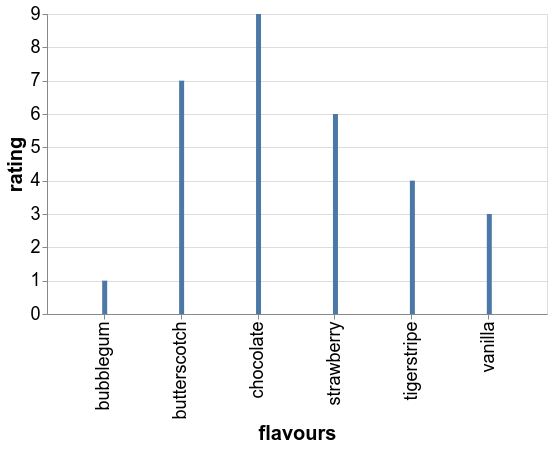

In [46]:
Chart(df).mark_bar().encode(
    x='flavours',
    y='rating',
)

### notice the form of the code:
- the *Chart* object takes in the data (df)
- the *mark* type specifies the geometric shape we want in our chart
- the *encoding* object specifies the mapping between our data columns and our aesthetic options

### all Altair charts are specified in this way
 - Chart, mark type, encoding
 - thus a consistent and concise API

## Mark types

### all mark types so far (more on the way):

- mark_bar
- mark_area
- mark_circle
- mark_geoshape
- mark_point	
- mark_rect
- mark_rule
- mark_square
- mark_text	
- mark_tick

more info about marks [here](https://altair-viz.github.io/user_guide/marks.html#)

### Practice with your mark types

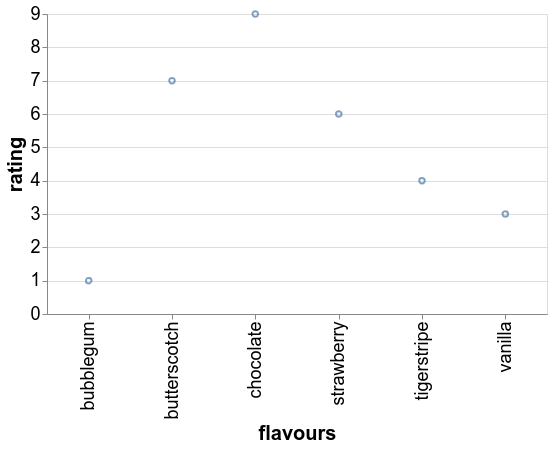

In [47]:
Chart(df).mark_point().encode(
    x='flavours',
    y='rating',
)

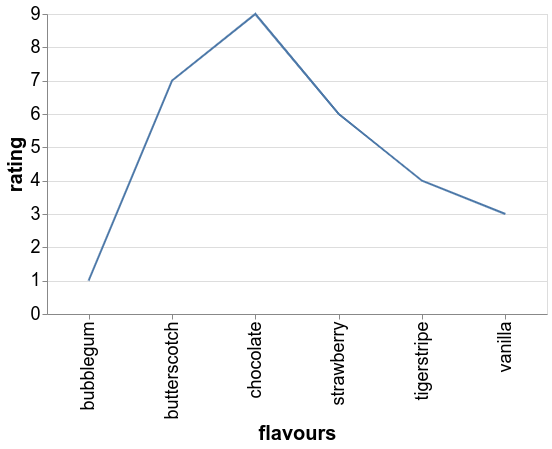

In [48]:
Chart(df).mark_line().encode(
    x='flavours',
    y='rating',
)

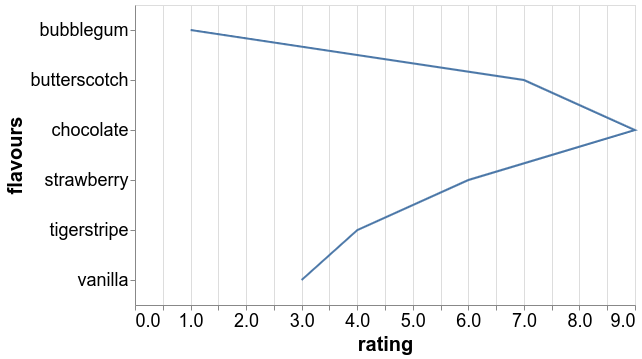

In [49]:
Chart(df).mark_line().encode(
    y='flavours',
    x='rating',
)

In [50]:
weather=data.seattle_weather()
weather.head()
jan_2012=weather.query("date>'2011-12-31'")
jan_2012.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

## Mark properties

- color
- size
- opacity

#### Note, these are not encodings (mappings to data), but instead they are direct aesthetic properties for your mark type

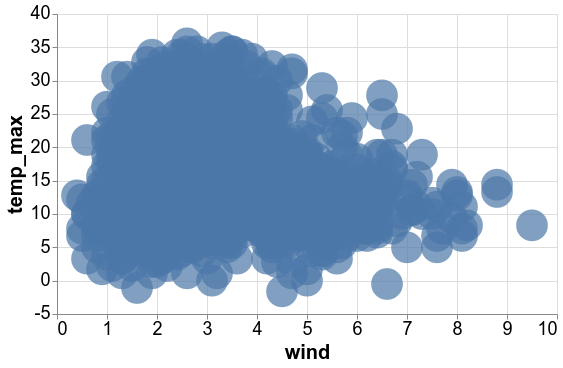

In [51]:
Chart(weather).mark_circle(size=1000).encode(
    y='temp_max',
    x='wind'
)

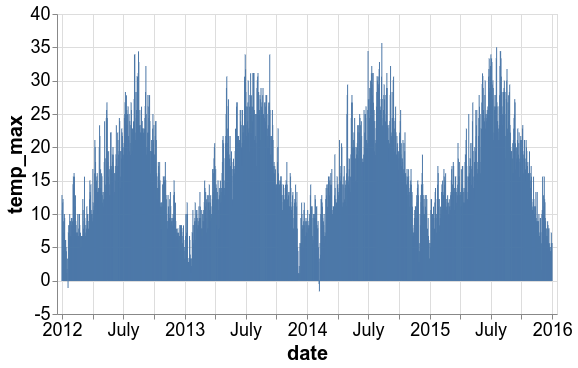

In [52]:
Chart(jan_2012).mark_bar(size=1).encode(
    y='temp_max',
    x='date',
)

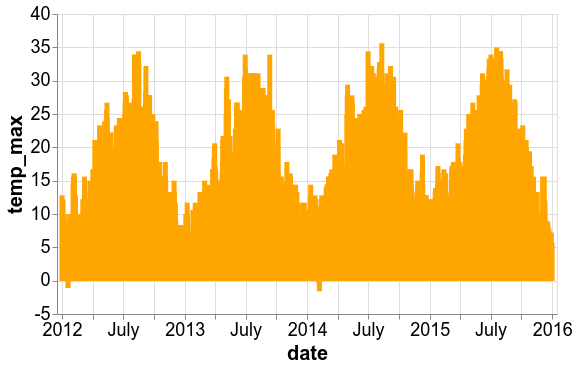

In [53]:
Chart(jan_2012).mark_bar(color='orange').encode(
    y='temp_max',
    x='date',
)

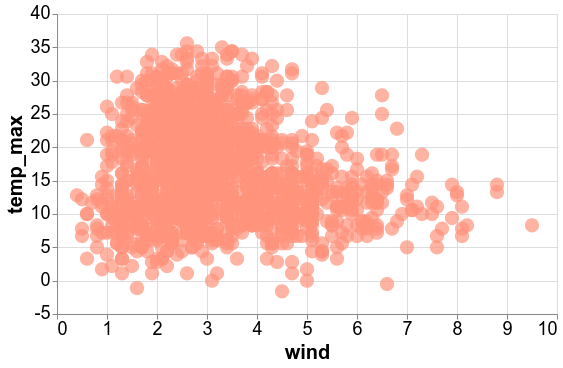

In [54]:
Chart(jan_2012).mark_circle(color='#FF937C', size=200).encode(
    y='temp_max',
    x='wind',
)

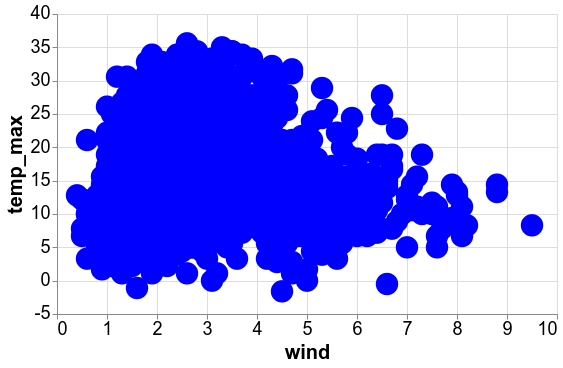

In [55]:
Chart(jan_2012).mark_circle(opacity=1, color='blue', size=500).encode(
    y='temp_max',
    x='wind',
)

## Encodings  
 [docs](https://altair-viz.github.io/user_guide/encoding.html)

- position encodings:

 - mapping the data to coordinates in space

- mark encodings:

 - color, size, shape, opacity, etc...
 
- facet encodings:
  - creating a group of charts each showing a different view of the data
  - charts arranged in rows or columns
 

many more and more to come...





### position encodings

- we will use the seattle weather data
- when we need to data wrangle, we will use Pandas
 - remember that you can't separate data cleaning from viz

In [56]:
weather = data.seattle_weather()
jan_2012=weather.query("date < '2012-02-01'")
jan_2012

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain
10 2012-01-11            0.0       6.1      -1.1   5.1      sun
11 2012-01-12            0.0       6.1      -1.7   1.9      sun
12 2012-01-13            0.0       5.0      -2.8   1.3      sun
13 2012-01-14            4.1       4.4       0.6   5.3     snow
14 2012-01-15            5.3       1.1      -3.3   3.2     snow
15 2012-01-16            2.5       1.7      -2.8   5.0     snow
16 2012-01-17            8.1       3.3       0.0   5.6     snow
17 2012-01-18           19.8       0.0      -2.8   5.0     snow
18 2012-01-19           15.2      -1.1      -2.8   1.6     snow
19 2012-01-20           13.5       7.2      -1.1   2.3     snow
20 2012-01-21            3.0       8.3       3.3   8.2     rain
21 2012-01-22            6.1       6.7       2.2   4.8     rain
22 2012-01-23            0.0       8.3       1.1   3.6     rain
23 2012-01-24            8.6      10.0       2.2   5.1     rain
24 2012-01-25            8.1       8.9       4.4   5.4     rain
25 2012-01-26            4.8       8.9       1.1   4.8     rain
26 2012-01-27            0.0       6.7      -2.2   1.4  drizzle
27 2012-01-28            0.0       6.7       0.6   2.2     rain
28 2012-01-29           27.7       9.4       3.9   4.5     rain
29 2012-01-30            3.6       8.3       6.1   5.1     rain
30 2012-01-31            1.8       9.4       6.1   3.9     rain

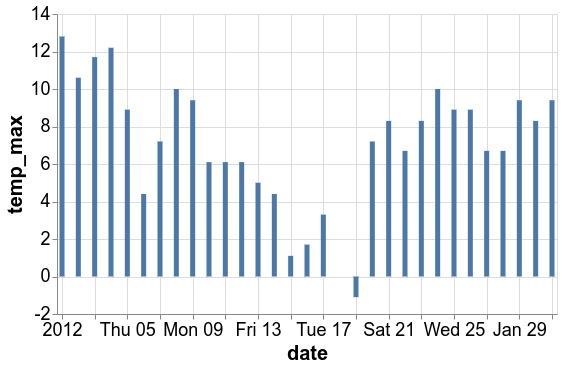

In [57]:
Chart(jan_2012).mark_bar().encode(
    y='temp_max',
    x='date',
)

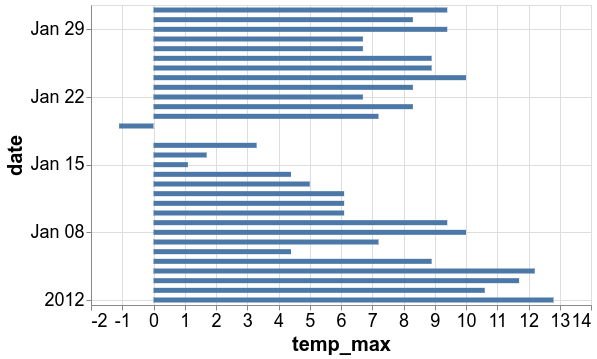

In [58]:
Chart(jan_2012).mark_bar().encode(
    x='temp_max',
    y='date',
)

### mark encodings

 - color
 - size
 - shape
 - opacity

In [59]:
jan_2012

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain
10 2012-01-11            0.0       6.1      -1.1   5.1      sun
11 2012-01-12            0.0       6.1      -1.7   1.9      sun
12 2012-01-13            0.0       5.0      -2.8   1.3      sun
13 2012-01-14            4.1       4.4       0.6   5.3     snow
14 2012-01-15            5.3       1.1      -3.3   3.2     snow
15 2012-01-16            2.5       1.7      -2.8   5.0     snow
16 2012-01-17            8.1       3.3       0.0   5.6     snow
17 2012-01-18           19.8       0.0      -2.8   5.0     snow
18 2012-01-19           15.2      -1.1      -2.8   1.6     snow
19 2012-01-20           13.5       7.2      -1.1   2.3     snow
20 2012-01-21            3.0       8.3       3.3   8.2     rain
21 2012-01-22            6.1       6.7       2.2   4.8     rain
22 2012-01-23            0.0       8.3       1.1   3.6     rain
23 2012-01-24            8.6      10.0       2.2   5.1     rain
24 2012-01-25            8.1       8.9       4.4   5.4     rain
25 2012-01-26            4.8       8.9       1.1   4.8     rain
26 2012-01-27            0.0       6.7      -2.2   1.4  drizzle
27 2012-01-28            0.0       6.7       0.6   2.2     rain
28 2012-01-29           27.7       9.4       3.9   4.5     rain
29 2012-01-30            3.6       8.3       6.1   5.1     rain
30 2012-01-31            1.8       9.4       6.1   3.9     rain

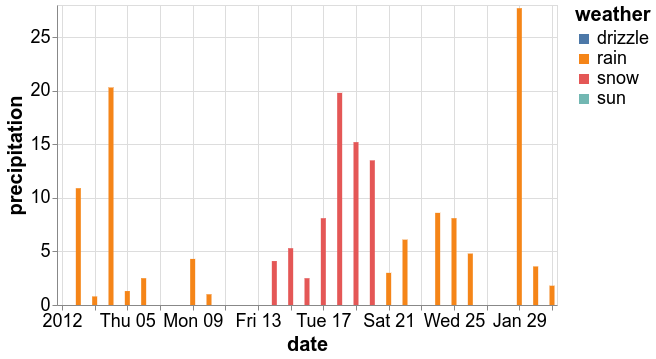

In [60]:
Chart(jan_2012).mark_bar().encode(
    y='precipitation',
    x='date',
    color='weather'
)

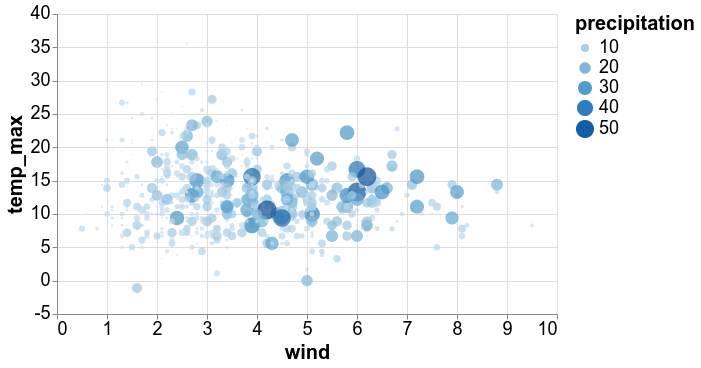

In [61]:
Chart(weather).mark_circle().encode(
    y='temp_max',
    x='wind',
    color='precipitation',
    size='precipitation'
)

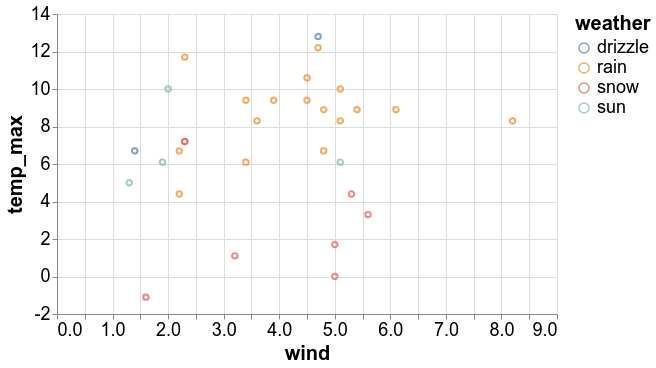

In [62]:
Chart(jan_2012).mark_point().encode(
    y='temp_max',
    x='wind',
    #shape='weather',
    color='weather'
)

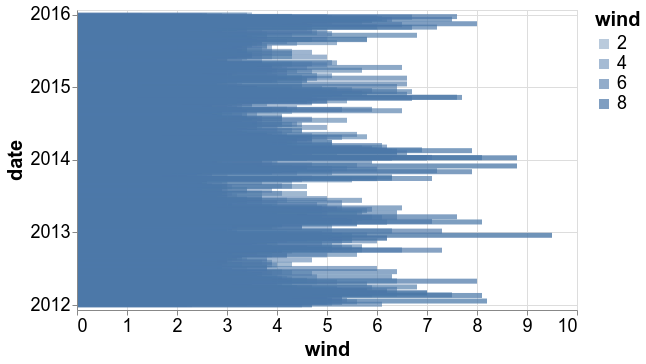

In [63]:
Chart(weather).mark_bar().encode(
    y='date',
    x='wind',
    opacity='wind',
)

#### Try using multiple mark encodings together in the same chart

- for example, what happens when you specify color and shape, or any other combination of mark encodings?

- remember that so far you have learned about:
 - position encodings (x,y)
 - mark encodings (size, color, shape, opacity)

### facet encodings

- using seperate charts to visualize different views of the data
- for example, you might want to compare wind and temperature for each weather type
 - display wind vs temperature but make a new chart for each weather type

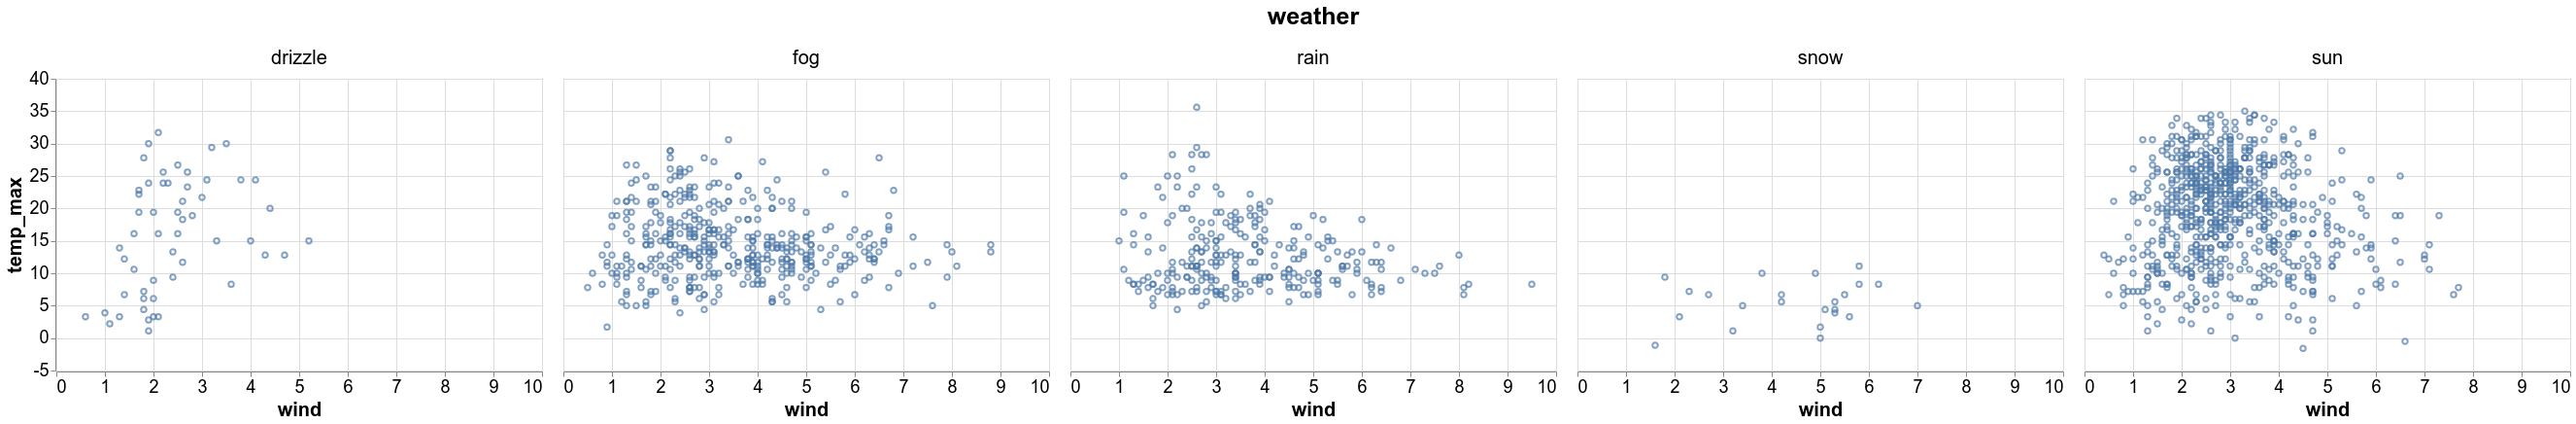

In [64]:
Chart(weather).mark_point().encode(
    y='temp_max',
    x='wind',
    column='weather',
)

#### If you use the "row" encoding, what do you think this will do?

## Data Types

- Nominal
- Ordinal
- Quantitative
- Temporal

Data types can be automatically inferred by Altair but sometimes you will want to specifiy them explicitly
- Altair has a shorthand way of doing specifying data types, and a longer way (that allows for more customization)

Let's work with a new dataset and get some practice with different data types to see how they affect the viz

In [65]:
cars = data.cars()
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

### shorthand syntax  for data types
- in the chart below, notice the colon and the letter
 - Q for quantitative
   - a set of numbers for which there is a true zero
   - supports all mathematical comparisons
   - height, weight, number of students
 - N for nominal
   - categorical things 
   - ice cream flavors, types of cars
 - O for ordinal
  - ordered set but where the distance between items is not known
    - runners in a race
    - usually a small-ish set (e.g., no more than 10)
    - supports only < and > operators
 - T for temporal
   - dates, times



- we will cover the longer syntax for this later if there is time

### notice the effect of changing the data type for the color encoding

- here Altair simly uses some shorthand syntax to denote the data type
 - :N, :Q, :O, or :T 

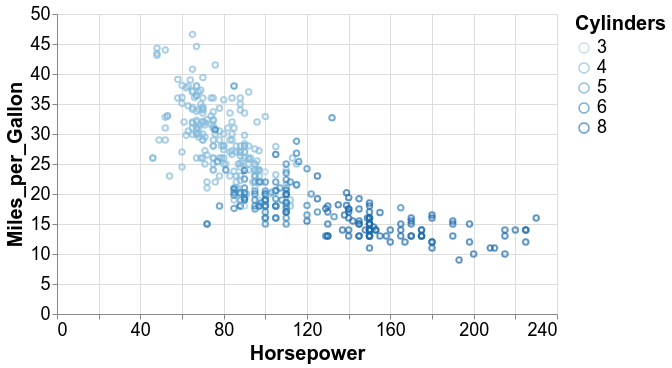

In [66]:
Chart(cars).mark_point().encode(
  x='Horsepower:Q',
  y='Miles_per_Gallon:Q',
  color='Cylinders:O'
)

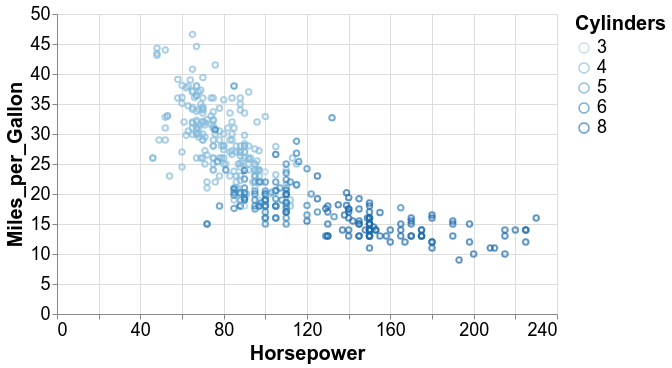

In [67]:
Chart(cars).mark_point().encode(
  x='Horsepower:Q',
  y='Miles_per_Gallon:Q',
  color='Cylinders:O'
)

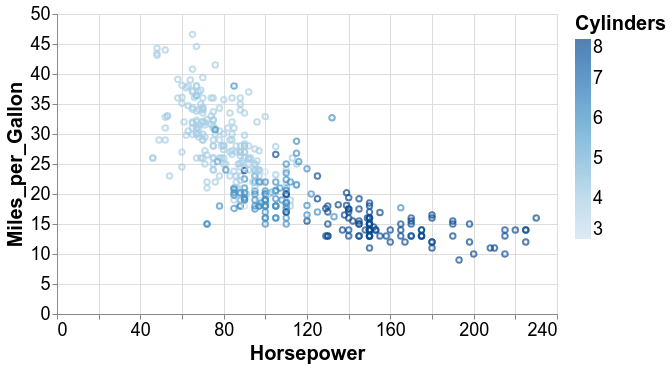

In [68]:
Chart(cars).mark_point().encode(
  x='Horsepower:Q',
  y='Miles_per_Gallon:Q',
  color='Cylinders:Q'
)

## Aggregations

- isn't this done as part of data cleaning/formatting?
  - yes but sometimes aggregations are done as part of data viz
  - perhaps it is easier this way, or when you need access to the individual records as well as the aggregates
  - remember the split-apply-combine concept? 
   - this is used behind the scenes in Altair to control viz with aggregation
    
- a list of built-in aggregations can be found [here](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation)

- just like data types and encodings, Altair has a short-hand way of specifying binning and aggregations

In [69]:
weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

In [70]:
weather.groupby('weather').mean()

precipitation   temp_max  temp_min      wind
weather                                              
drizzle       0.018519  15.909259  7.153704  2.420370
fog           6.461557  14.470316  8.044039  3.447689
rain          5.103475  12.584942  6.594208  3.671815
snow          9.047826   5.504348  0.347826  4.395652
sun           0.335294  19.362745  9.275490  2.990896

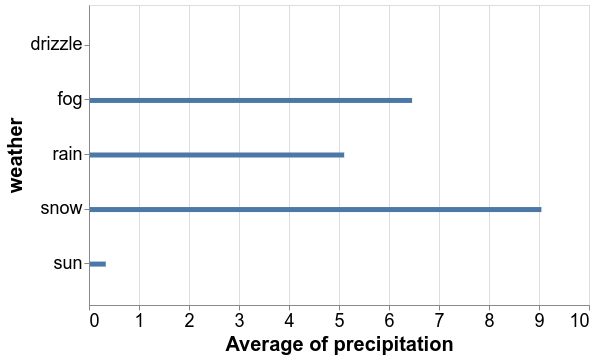

In [71]:
Chart(weather).mark_bar().encode(
    x='average(precipitation)',
    y='weather',
    tooltip='average(precipitation)'
)

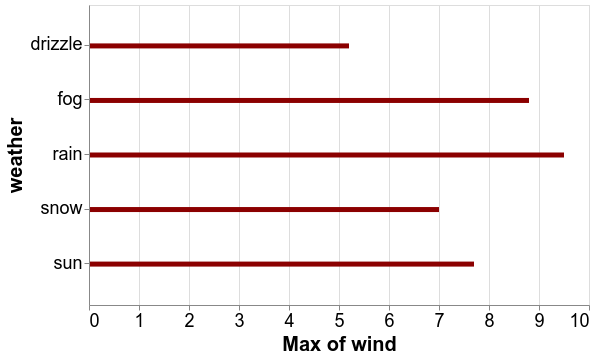

In [72]:
Chart(weather).mark_bar(color='darkred').encode(
    x='max(wind)',
    y='weather'
)

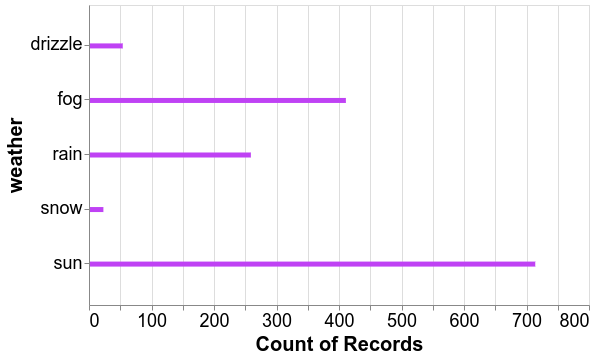

In [73]:
Chart(weather).mark_bar(color='#bf42f4').encode(
    x='count()',
    y='weather',
    tooltip=[Tooltip('average(wind)', title='wind speed avg')]
)

In [74]:
weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

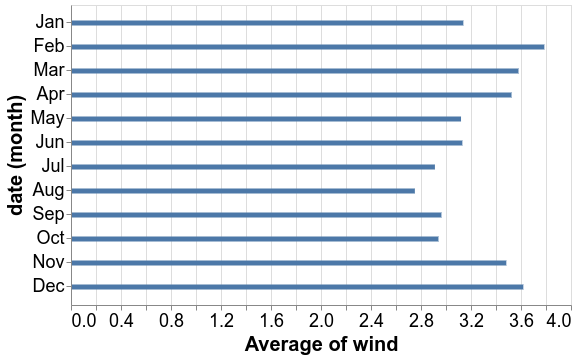

In [75]:
Chart(weather).mark_bar().encode(
    x='average(wind)',
    y='month(date):N'
)

### what will happen if I use the "year" aggregate on the chart above?

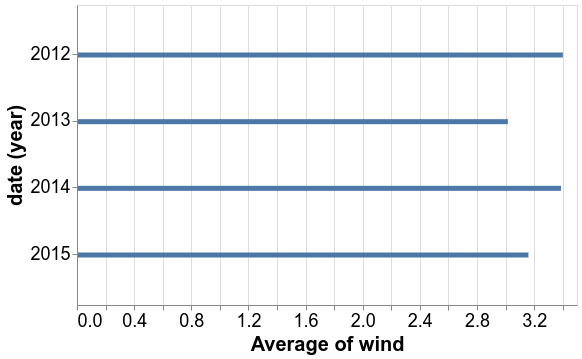

In [76]:
Chart(weather).mark_bar().encode(
    x='average(wind)',
    y='year(date):N'
)

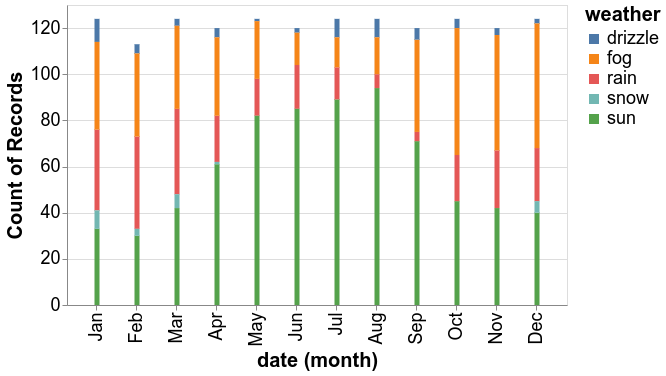

In [77]:
Chart(weather).mark_bar().encode(
    y='count()',
    x='month(date):N',
    color='weather'
)

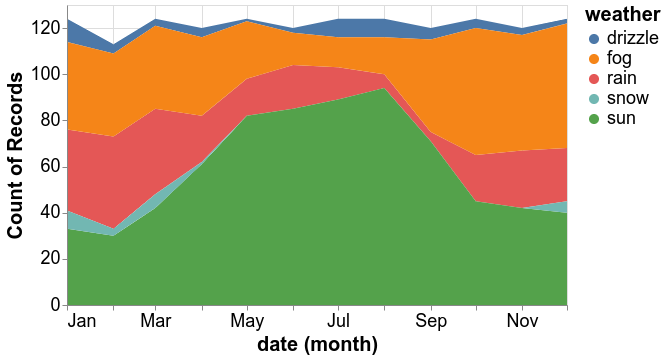

In [78]:
Chart(weather).mark_area().encode(
    y='count()',
    x='month(date)',
    color='weather'
)

### now it's your turn...

- practice using aggregations with the cars dataset
- remember I linked to a list of aggregations above

In [79]:
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

## Binning 
- turn a continous (quantitaive) variable in a smaller set of discrete "bins"
- so-called discretizing (eg., like when making a histogram)

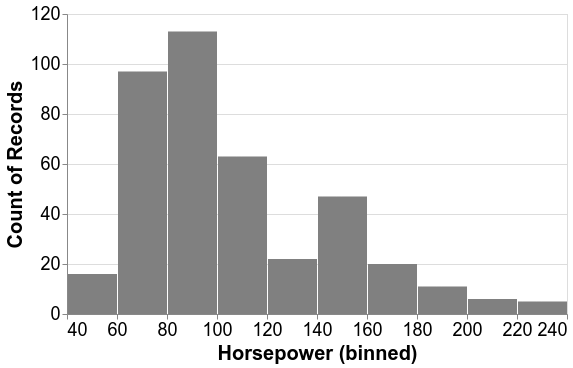

In [80]:
Chart(cars).mark_bar(color='gray').encode(
    x=X('Horsepower', bin=Bin(maxbins=10)),
    y='count()'
)

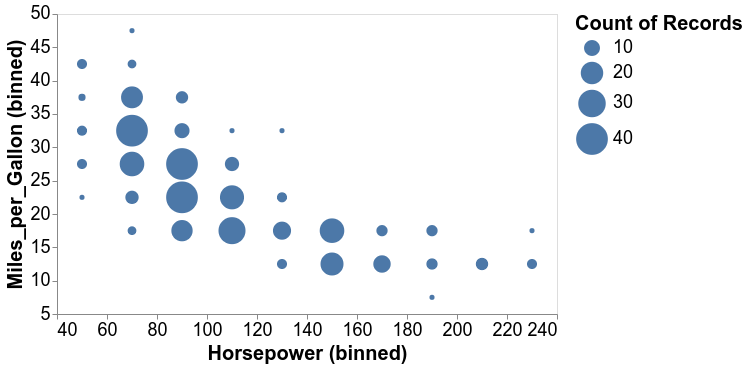

In [81]:
Chart(cars).mark_circle().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
)

### what do you think would happen if we encoded the count aggregate as color instead of size?

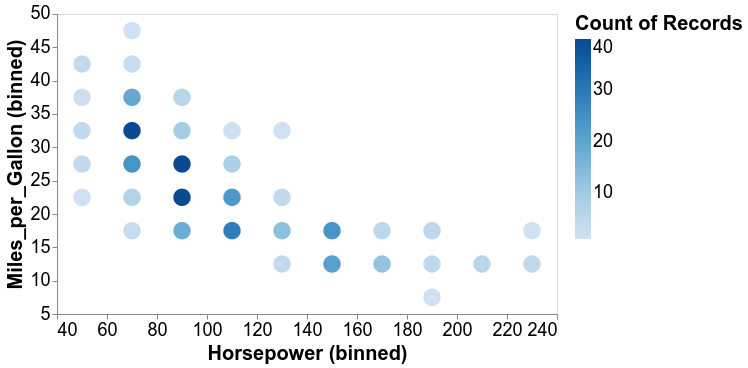

In [82]:
Chart(cars).mark_circle(size=300).encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    color='count()',
)

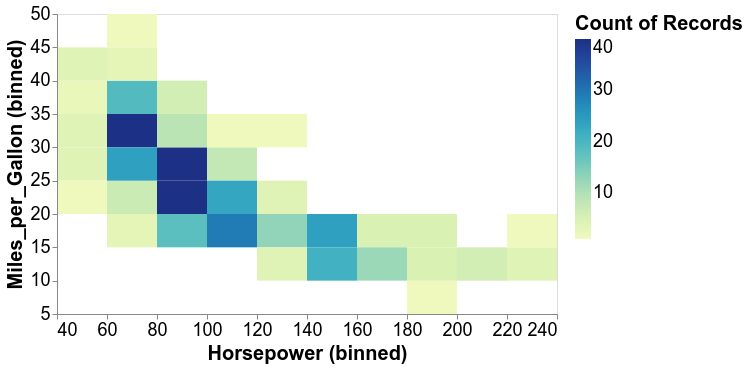

In [83]:
Chart(cars).mark_rect().encode(
    x=X('Horsepower', bin=True),
    y=Y('Miles_per_Gallon', bin=True),
    color='count()',
)

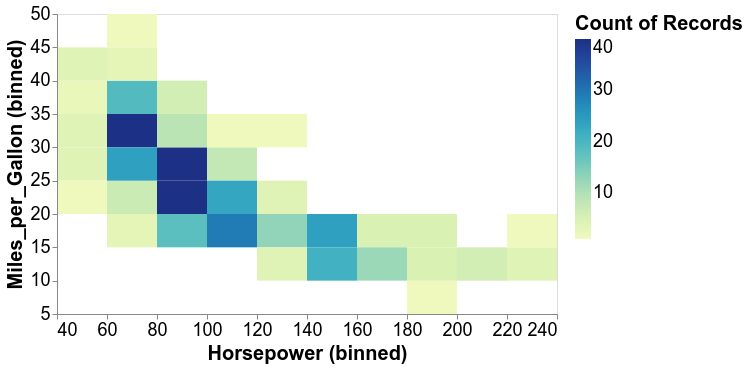

In [84]:
Chart(cars).mark_rect().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    color='count()',
)